# Übung: Fall mit Stokes Reibung

Dieses Notebook ist eine Art Lückentext mit dessen Hilfe Ihr ein einfaches pyhsikalisches Problem, den Fall mit Stokes-Reibung berechnen und darstellen könnt. (siehe Hausaufgabe 3.1)

Die Formel zur Berechnung der Höhe lautet:

\begin{align*}
 h(t)= \left( \frac{m}{\beta}\right) \cdot \left(v_0 + \frac{m\cdot g}{\beta}\right) \left(1-\exp\left(-\frac{\beta t}{m} \right) \right) - \frac{mg}{\beta} \cdot t +h_0
\end{align*}

$\beta$ ist ein Reibungskoeffizient für die Reibungskraft, die sich proportional zur Fallgeschwindigkeit $v$ verhält, und $v_0=0$ [ms$^{-1}$] die Anfangsgeschwindigkeit.
$h_0$ ist die Ausgangshöhe und $g$ ist die Erdbeschleunigung 9.81 [ms$^{-2}$].

Wir wollen im Folgenden den zeitlichen Verlauf des Falls für verschiedene Reibungskoeffizienten berechnen.
Die Starbedingungen seien:

$$v_0=0$$
$$\beta=[1,0.6,0.4]$$
$$h_0=1000$$
$$m=1$$


(in Analogie zum Übungsblatt $\gamma=\frac{\beta}{m}$)

## Importieren der Bibliotheken

Zunächst importieren wir die Bibliotheken, die wir im Folgenden verwenden wollen.

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.constants import g 

#Scipy enthält neben vielen nützlichen Funktionen, 
#u.a. zur Optimierung und numerischen Integration,
#auch die gängigen pyhsikalischen Konstanten. 
#Hier importieren wir uns lediglich g



## Definieren der Funktionen

Als nächstes wollen wir Funktionen definieren, die uns die gewünschten Werte berechnen.
Dazu sollte man sich anhand der Aufgabenstellung überlegen was berechnet werden soll.
Unsere Grundfunktion ist natürlich die in der Aufgabenstellung angegebene Formel zur Berechnung der Höhe.

Also definieren wir zunächst eine Funktion, die uns als Rückgabewert unsere aktuelle Höhe liefert:

In [6]:
def h_t(fric, t, h0, v0=0):
    # fric --> 1/gamma
    return fric*(v0+fric*g)*(1-np.exp(-t/fric))-fric*g*t+h0

#Hinweis: man kann in der funktionsdefinition einem Argument bereits einen Default-Wert zuweisen. zB v0=0
#         wird später im Funktionsaufruf kein Wert an der entsprechenden Stelle angegeben, wird automatisch 
#         dieser Wert angenommen

Diese Funktion können wir nun direkt testen!
Hierfür überlegen wir uns die Startbedingungen, die Inkrementierung und eine Abbruchbedingung.


In [7]:
# Ergänze die Startbedinungen (v0, h0,t0,m ,beta)

v0=0
h0=h=1000
t=0
m=1
b=0.5
fric=m/b

# Definiere einen Zeitschritt dt und erstelle eine while-Schleife,
# die die Zeit inkrementiert und die entspechende Höhe ausrechnet
# Die Schleife soll stoppen wenn unser Objekt eine Höhe von 0 erreicht hat.
dt=1

while h>=0:
    h=h_t(fric,t,h0,v0)
    t=t+dt


Sofern unsere Schleife funktioniert und sinnvolle Werte liefert, sind wir eigendlich schon in der Lage die Aufgabe zu lösen. Dafür würden wir Startbedinungen verändern und die Zelle mit den neuen Werten erneut ausführen.
Schöner wäre es allerdings, wenn man dise Aufgabe etwas abkürzen könnte.

Dafür wollen wir unsere Berechungsschleife in eine weitere Funktion einbauen, die als Argumente die Starbedingungen nimmt und die Ergebnisse in Arrays speichert.
So können wir einfach unsere Bedinungen ändern und die Werte speichern um sie später gemeinsam darzustellen.

In [9]:
# Definiere eine Funktion, die  die Startbedingungen als Argumente besitzt 
# und Arrays mit den berechneten Höhen bzw den Zeitschitten zurück liefert.

def run(h0, dt, beta, m=1, v0=0):
    print("An object of mass",m, "kg falls from a hight of", h0, "m.\n"
         "beta=",beta,"dt=",dt,"v0=",v0,"\n")  
    fric = m/beta
    hoehe=h0
    t=dt
    
    time= np.array([0])   #Array für die Zeitpunkte der Berechnung (erster Wert: t0=0)
    height=np.array([h0])  #Array für die Zeitpunkte der Berechnung (erster Wert: h0)
    
    
    while hoehe >= 0.:
        hoehe= h_t(fric,t,h0)
        height=np.append(height,[hoehe])
        time=np.append(time,[t])
        t= t+dt
  
    return time, height  # Rückgabe der Arrays

## Berechnung

Es ist vollbracht! Wollen wir unsere Kurve mit verschiedenen Startwerten berechnen und vergleichen.
Variiere hierfür zunächste den Reibungskoeffizienten $\beta$. Speichere die von der Funktion zurückgegebenen Arrays für jedes Parameter-Set in zwei neue Variablen.


In [10]:
# Berechne die Bahnkurve für beta=[1.0,0.7,0.4] 
# mit einem Zeitschritt von dt=0.5 und einer Starhöhe von h0=100m
time,height=run(1000,0.5,1.0)

time2,height2=run(1000,0.5,0.5)
time3,height3=run(1000,0.5,0.4)


An object of mass 1 kg falls from a hight of 1000 m.
beta= 1.0 dt= 0.5 v0= 0 

An object of mass 1 kg falls from a hight of 1000 m.
beta= 0.5 dt= 0.5 v0= 0 

An object of mass 1 kg falls from a hight of 1000 m.
beta= 0.4 dt= 0.5 v0= 0 



## Darstellung der Ergebnisse

Im folgenden wollen die die Trajektorie unseres Fallenden Gegenstands plotten und unsere Endgeschwindigkeit bestimmen.

### Trajektorie

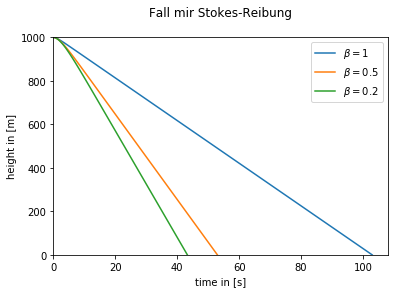

In [11]:
# Wir gehen hier genau wie im Einführungteil vor
# Zuerst erstellen wir die einzelnen Graphen mit plt.plot
# und Setzen unsere Plot-Eigenschaften, wie Titel usw.
# zum Schluss wir alles mit plot.show() ausgegeben


# Ergänze den Plot um die weiteren Datensets
plt.plot(time,height, label=r'$\beta=1$')
plt.plot(time2,height2, label=r'$\beta=0.5$')
plt.plot(time3,height3, label=r'$\beta=0.2$')

# Ergänze sinnvolle Werte für

#den Wertebereich von x,y-Achse
plt.xlim(0, )     
plt.ylim(0 ,1000)  

# Titel für den Plot und die Achsen
plt.xlabel('time in [s]')   
plt.ylabel('height in [m]')
plt.title("Fall mir Stokes-Reibung\n")
plt.legend()   # Fasst die vergebenen Label in einer Legende zusammen

plt.show()




### Engeschwindigkeit

Die Endgeschwindigkeit, enschpricht der Steigung des linearen Bereichs unserer Bahnkurve.
Für $t\rightarrow\infty$ erwarten wir, dass sich unsere Geschwindkeit 

$\frac{\text{d}h(t)}{\text{d} t}= v(t)=-\frac{mg}{\beta}\cdot(1-\exp(-\frac{\beta t}{m})) + v_0 \cdot \exp(-\frac{\beta t}{m})$

den Wert $-\frac{mg}{\beta}$ annähert.

Das Wollen wir im Folgenden überprüfen. 
Hierzu wollen wir zum Einen mit einem Linearen Fit die Steigung bestimmen und zum anderen mit Hilfe der numpy.gradient funktion die Geschwindigkeiten in Abhängikeit zur Zeit plotten, um uns das Ergebnis zu veranschaulichen.

In [14]:
# Schaue dir mit 
#np.ployfit?
#np.gradient?
#np.abs?
#Die Dokumentation der verwendeten Befehle an, um zu verstehen, 
#Was diese Funktionen tun und welche Argumente sie benötigen

# Wir definieren zwei Parameter m.b für unseren linearen Fit (y=m*x+b)
# Da wir nur den Linearen Bereich unserer Funktion betrachten wollen,
# schließen wir über sclicing die Ersten Werte aus
m,b = np.polyfit(time[10:], height[10:], 1)
print("Wir erreichen eine Endgeschwindigkeit von",np.abs(m),"m/s")
# Berechne nach dem gleichen Schema auch die Endgeschwindigkeiten der beiden anderen Datensets:

m,b = np.polyfit(time2[10:], height2[10:], 1)
print("Wir erreichen eine Endgeschwindigkeit von",np.abs(m),"m/s")

m,b = np.polyfit(time3[10:], height3[10:], 1)
print("Wir erreichen eine Endgeschwindigkeit von",np.abs(m),"m/s")

Wir erreichen eine Endgeschwindigkeit von 9.80659914875 m/s
Wir erreichen eine Endgeschwindigkeit von 19.5962721456 m/s
Wir erreichen eine Endgeschwindigkeit von 24.4379652371 m/s


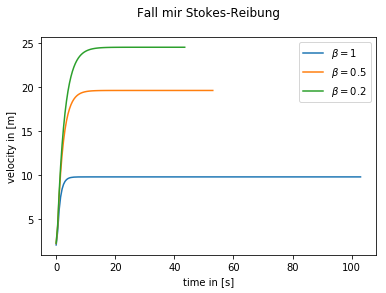

In [15]:
# Hier Werden die Geschwindigkeiten berechnet und geplottet
# (natürlich hätte man in unserem Fall die Geschwindigkeit auch direkt ausrechnen können,
# aber für Fälle in denen nicht die exakte Lösung bekannt ist kann man die Funktion np.gradient verwenden)

# Ergänze die Plot-Beschriftung und die beiden weiteren Datensätze.

v=np.abs(np.gradient(height,0.5))
v2=np.abs(np.gradient(height2,0.5))
v3=np.abs(np.gradient(height3,0.5))


# Titel für den Plot und die Achsen
plt.xlabel('time in [s]')   
plt.ylabel('velocity in [m]')
plt.title("Fall mir Stokes-Reibung\n")

plt.plot(time,v, label=r'$\beta=1$')
plt.plot(time2,v2, label=r'$\beta=0.5$')
plt.plot(time3,v3, label=r'$\beta=0.2$')
plt.legend()

plt.show()

# Links


- https://gitlab.gwdg.de/jschulz1/math_prog (Python-Vorlesung von Jochen Schulz)
- https://github.com/jakevdp/PythonDataScienceHandbook (Kapitel 1,2,4)
- https://github.com/ipython/ipython-in-depth 
